# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [10]:
import numpy as np

# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
def slope(x, y):
    num = np.mean(x) * np.mean(y) - np.mean(x * y)
    den = np.mean(x) ** 2 - np.mean(x ** 2)
    return num / den

def slope_intercept(x, y):
    m = slope(x, y)
    c = np.mean(y) - m * np.mean(x)
    return m, c

def r_squared(x, y_hat, m, c):
    y_model = m * x + c
    num = np.sum((y_model - y_hat) ** 2)
    den = np.sum((y_model - np.mean(y_model)) ** 2)
    return 1 - num / den

def regression(x, y):
    m, c = slope_intercept(x, y)
    r2 = r_squared(x, y, m, c)
    return m, c, r2
    


X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)

m, c, r2 = regression(X, Y)

# YOU DA MAN!!

In [11]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

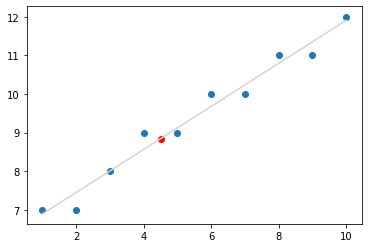

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# Make prediction for x = 4.5 and visualize on the scatter plot

plt.scatter(X, Y)

plt.plot(X, [m * x + c for x in X], color='lightgray')
plt.scatter(4.5, m * 4.5 + c, color='red')


## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 

Y = 5.539019232705614 * x + -204.48343570637024


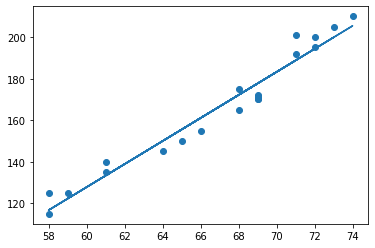

In [23]:
import pandas as pd
df = pd.read_csv('heightweight.csv')
df.head()

X = df['height']
Y = df['weight']
m, c, r2 = regression(X, Y)

plt.scatter(X, Y)
plt.plot(X, [m * x + c for x in X])
print("Y = {} * x + {}".format(m, c))